### PROJET : PRÉDICTION DE PROBABILITÉ D'INONDATION


Ce projet s’inscrit dans le cadre d’un travail pratique en Intelligence Artificielle portant sur la comparaison de modèles de régression supervisée.

À partir d’un dataset de grande taille (plus de 1 000 observations et plus de 10 variables explicatives), nous avons étudié la prédiction du risque d’inondation en fonction de facteurs climatiques, hydrologiques et environnementaux.

Deux approches de modélisation ont été mises en œuvre :

- La régression linéaire multiple, utilisée comme modèle de référence interprétable,

- L’algorithme Random Forest Regressor, afin de capturer les relations non linéaires et les interactions complexes entre variables.

Le projet couvre l’ensemble du pipeline de data science :

- Nettoyage et préparation des données,

- Analyse exploratoire,

- Entraînement des modèles,

- Évaluation des performances (MSE, RMSE, R²),

- Comparaison critique des résultats obtenus.

L’objectif final est d’identifier le modèle le plus adapté à la prédiction des inondations et de discuter les notions de bias, variance, underfitting et overfitting dans un contexte réel.

### PROBLÉMATIQUE DU PROJET

#### Contexte et enjeux

Les inondations sont des catastrophes naturelles qui touchent des millions de personnes chaque année, causant des pertes humaines, des dégâts matériels et des perturbations économiques. Face à l’augmentation de la fréquence et de l’intensité des événements extrêmes liée au changement climatique, la capacité à prédire et anticiper les risques d’inondation devient un enjeu majeur pour la gestion des risques et la protection des populations.

#### Problématique principale

Comment peut-on développer un modèle de Machine Learning capable de prédire avec précision la probabilité d’inondation en se basant sur un ensemble de facteurs environnementaux, infrastructurels et socio-politiques ?

#### Objectifs du projet
Objectif principal : 
- Développer un modèle prédictif fiable pour estimer la probabilité d’inondation à partir de 20 variables explicatives.

Objectifs spécifiques :
- Analyser les corrélations entre les variables explicatives et la variable cible
- Comparer plusieurs algorithmes de Machine Learning
- Évaluer les performances des modèles
- Identifier les variables les plus importantes pour la prédiction
- Diagnostiquer les problèmes de biais, variance, sous-ajustement et surapprentissage


### PRÉSENTATION DU DATASET
#### Bibliothèque necessaire

In [1]:
import pandas as pd # Manipulation et analyse de données
import numpy as np # Calculs numériques
import matplotlib.pyplot as plt # Visualisation de données
import seaborn as sns # Visualisation de données avancée
from sklearn.model_selection import train_test_split # Division des données en ensembles d'entraînement et de test
from sklearn.preprocessing import StandardScaler # Normalisation des données
from sklearn.linear_model import LinearRegression, Ridge, Lasso # Modèles de régression linéaire
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor # Modèles d'ensemble
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # Évaluation des modèles
from sklearn.model_selection import cross_val_score # Validation croisée
import warnings
warnings.filterwarnings('ignore')

# Configuration pour l'affichage
try:
    plt.style.use('seaborn-v0_8-darkgrid')
except:
    try:
        plt.style.use('seaborn-darkgrid')
    except:
        plt.style.use('default')
        
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

#### Chargement des données

In [3]:
# Dataset d'entraînement
train_df = pd.read_csv('datasets/train.csv')

# Dataset de test
test_df = pd.read_csv('datasets/test.csv')

# Affichage des premières lignes du dataset d'entraînement
train_df.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,4,2,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,6,9,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,5,6,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,8,5,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,3,5,2,2,6,6,4,1,2,3,5,0.415


#### Informations générales sur le dataset

In [4]:
# Préparer les variables explicatives
feature_cols = [col for col in train_df.columns if col not in ['id', 'FloodProbability']]

print(f"Dataset: {len(train_df):,} observations, {len(feature_cols)} variables explicatives")
print(f"Valeurs manquantes: {train_df.isnull().sum().sum()}")

train_df.describe()

Dataset: 1,117,957 observations, 20 variables explicatives
Valeurs manquantes: 0


,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,4.949230e+00,4.945239e+00,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,2.083324e+00,2.078141e+00,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


#### Distribution de la variable cible

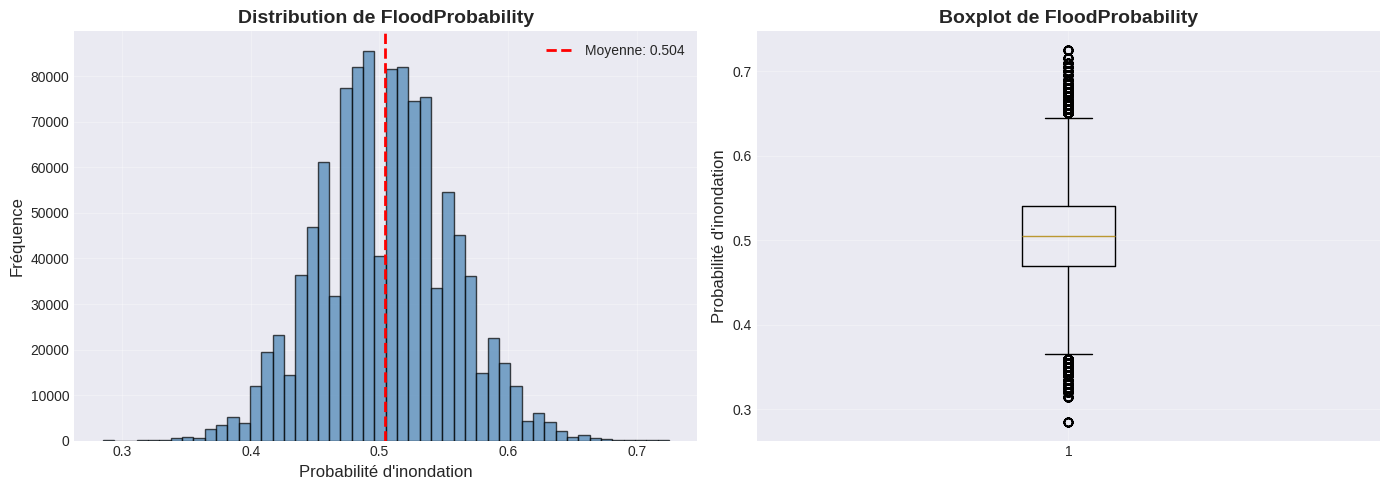

In [5]:
# Distribution de la variable cible
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(train_df['FloodProbability'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_xlabel('Probabilité d\'inondation', fontsize=12)
axes[0].set_ylabel('Fréquence', fontsize=12)
axes[0].set_title('Distribution de FloodProbability', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].axvline(train_df['FloodProbability'].mean(), color='red', linestyle='--', 
                linewidth=2, label=f'Moyenne: {train_df["FloodProbability"].mean():.3f}')
axes[0].legend()

axes[1].boxplot(train_df['FloodProbability'], vert=True)
axes[1].set_ylabel('Probabilité d\'inondation', fontsize=12)
axes[1].set_title('Boxplot de FloodProbability', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### AFFICHER LES DONNÉES ET COMMENTER LES GRAPHIQUES

Dans cette section, nous allons créer plusieurs graphiques pour visualiser :
1. Les relations entre les variables explicatives et la variable cible
2. Les distributions des variables
3. Les corrélations entre toutes les variables

#### Graphique 1: Relations entre variables clés et la cible

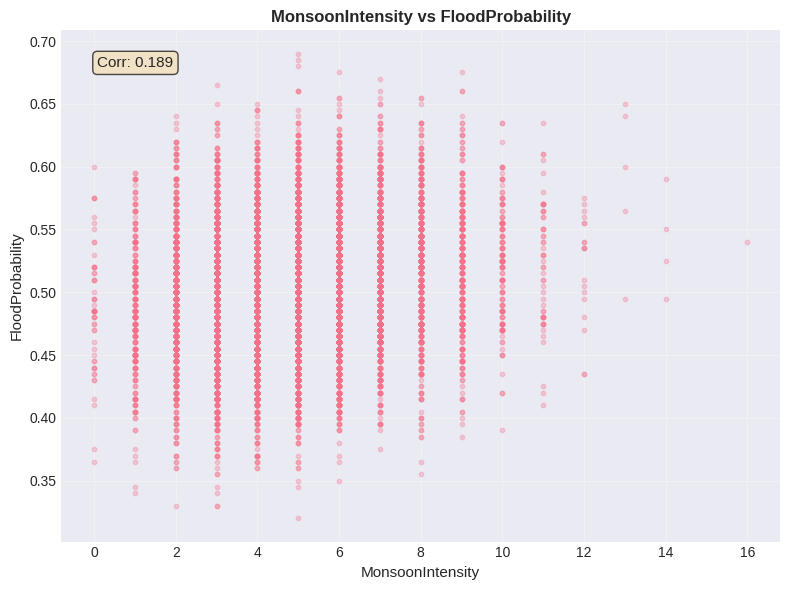

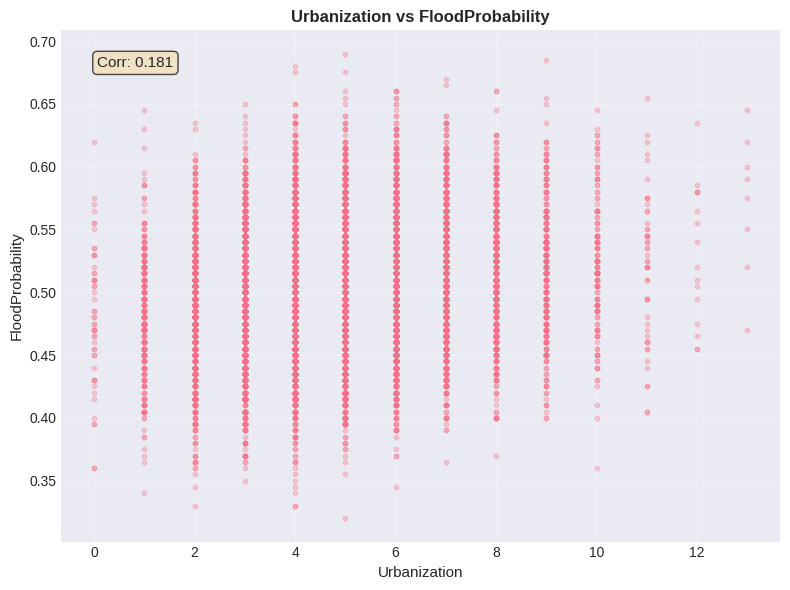

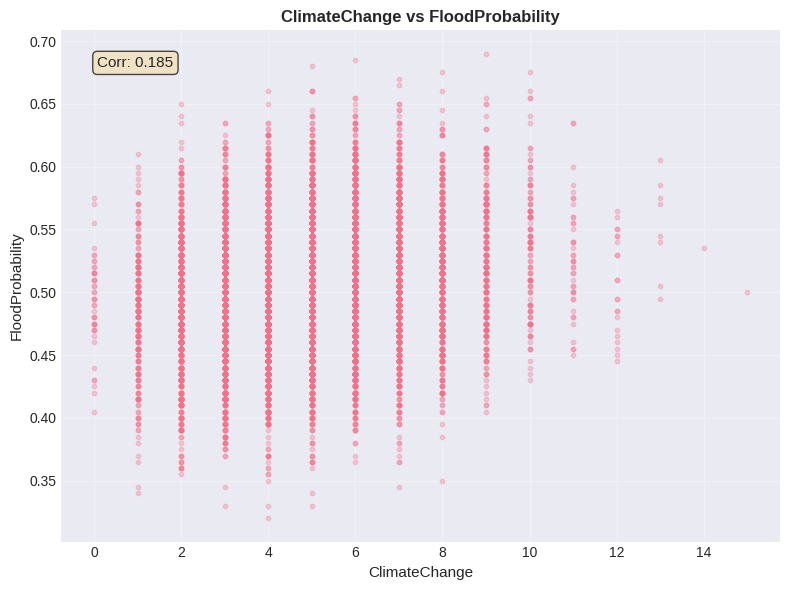

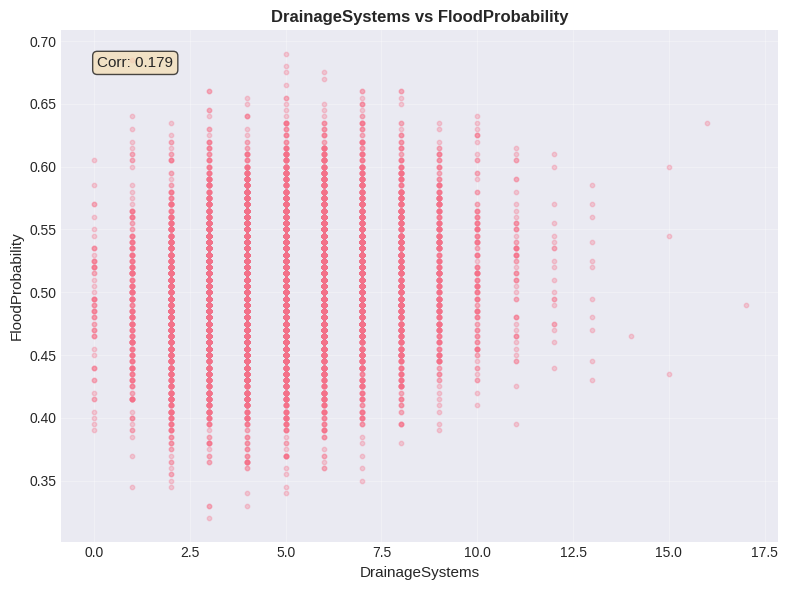

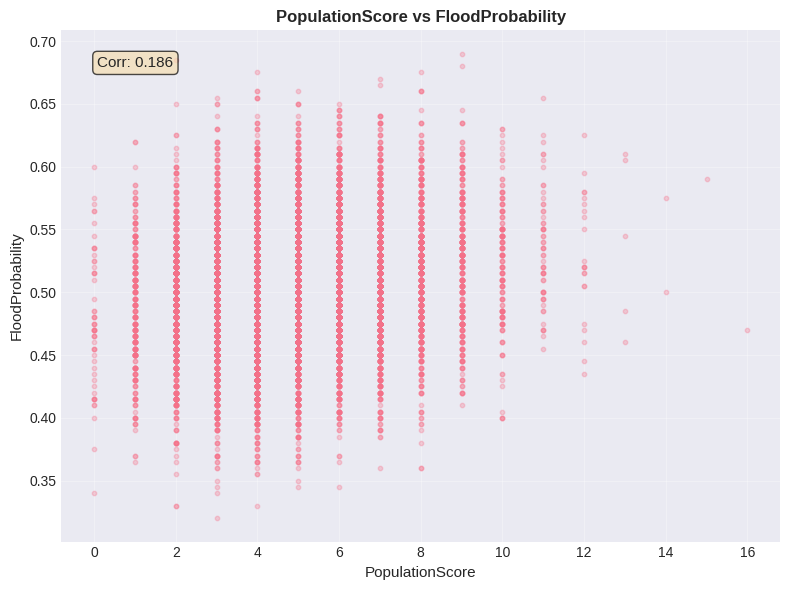

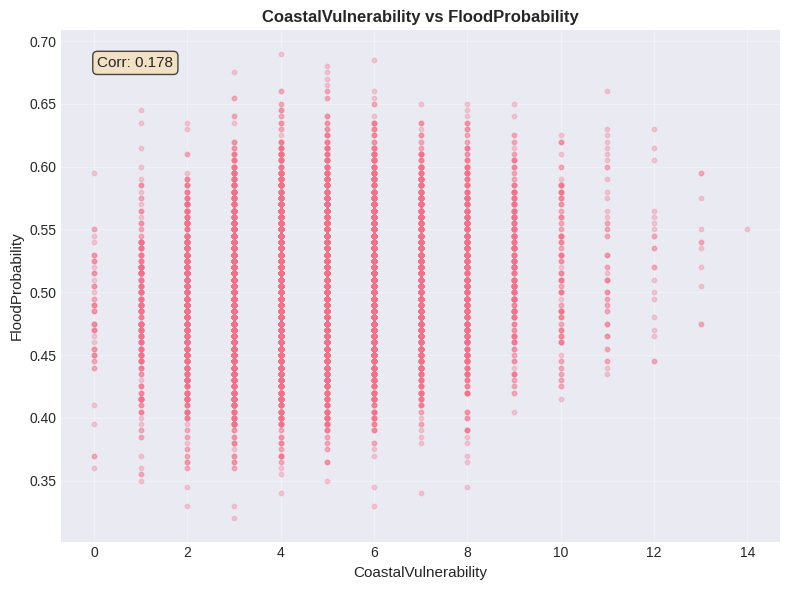

COMMENTAIRE:
Chaque graphique est affiché séparément pour une meilleure lisibilité.
Les corrélations indiquent la force de la relation linéaire entre chaque variable et la probabilité d’inondation.
Une corrélation proche de 0 indique une relation faible ou inexistante.


In [6]:
# Sélectionner 6 variables importantes pour visualisation
key_vars = ['MonsoonIntensity', 'Urbanization', 'ClimateChange', 
            'DrainageSystems', 'PopulationScore', 'CoastalVulnerability']

for var in key_vars:
    # Créer une nouvelle figure pour chaque variable
    plt.figure(figsize=(8, 6))
    
    # Utiliser un échantillon pour la visualisation
    sample_size = min(10000, len(train_df))
    sample_df = train_df.sample(n=sample_size, random_state=42)
    
    plt.scatter(
        sample_df[var],
        sample_df['FloodProbability'],
        alpha=0.3,
        s=10
    )
    
    plt.xlabel(var, fontsize=11)
    plt.ylabel('FloodProbability', fontsize=11)
    plt.title(f'{var} vs FloodProbability', fontsize=12, fontweight='bold')
    plt.grid(True, alpha=0.3)
    
    # Calculer et afficher la corrélation
    corr = train_df[var].corr(train_df['FloodProbability'])
    plt.text(
        0.05, 0.95,
        f'Corr: {corr:.3f}',
        transform=plt.gca().transAxes,
        fontsize=11,
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7)
    )
    
    plt.tight_layout()
    plt.show()

print("COMMENTAIRE:")
print("Chaque graphique est affiché séparément pour une meilleure lisibilité.")
print("Les corrélations indiquent la force de la relation linéaire entre chaque variable et la probabilité d’inondation.")
print("Une corrélation proche de 0 indique une relation faible ou inexistante.")


#### Graphique 2: Distributions des variables explicatives (échantillon de 12 variables)


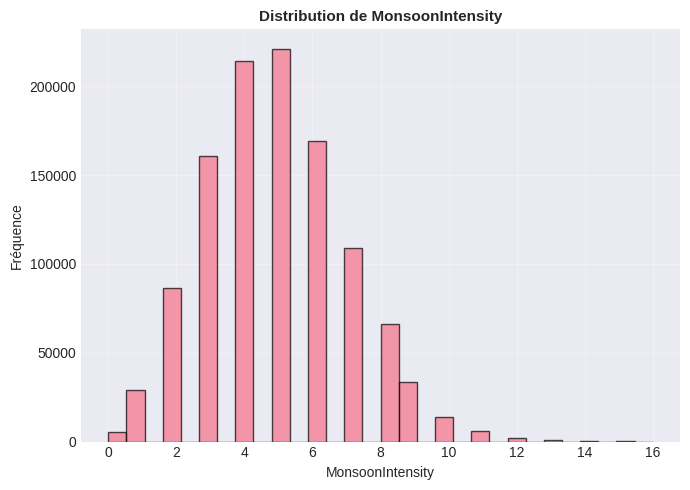

La variable MonsoonIntensity présente une distribution relativement symétrique. 
La moyenne est d’environ 4.92 avec un écart-type de 2.06. 
Cela indique la dispersion des valeurs autour de la moyenne. 
Cette distribution est importante à considérer pour le choix et le comportement des modèles de prédiction.
--------------------------------------------------------------------------------


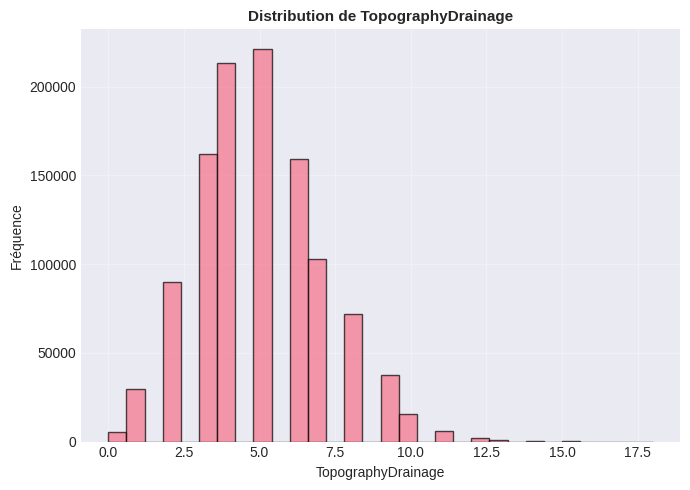

La variable TopographyDrainage présente une distribution relativement symétrique. 
La moyenne est d’environ 4.93 avec un écart-type de 2.09. 
Cela indique la dispersion des valeurs autour de la moyenne. 
Cette distribution est importante à considérer pour le choix et le comportement des modèles de prédiction.
--------------------------------------------------------------------------------


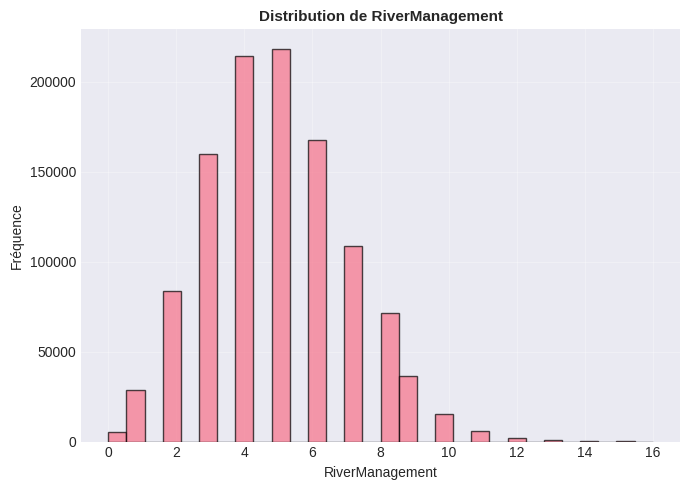

La variable RiverManagement présente une distribution relativement symétrique. 
La moyenne est d’environ 4.96 avec un écart-type de 2.07. 
Cela indique la dispersion des valeurs autour de la moyenne. 
Cette distribution est importante à considérer pour le choix et le comportement des modèles de prédiction.
--------------------------------------------------------------------------------


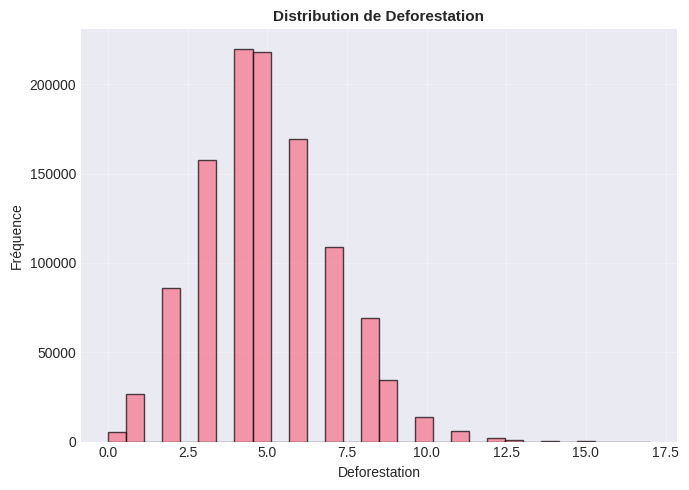

La variable Deforestation présente une distribution relativement symétrique. 
La moyenne est d’environ 4.94 avec un écart-type de 2.05. 
Cela indique la dispersion des valeurs autour de la moyenne. 
Cette distribution est importante à considérer pour le choix et le comportement des modèles de prédiction.
--------------------------------------------------------------------------------


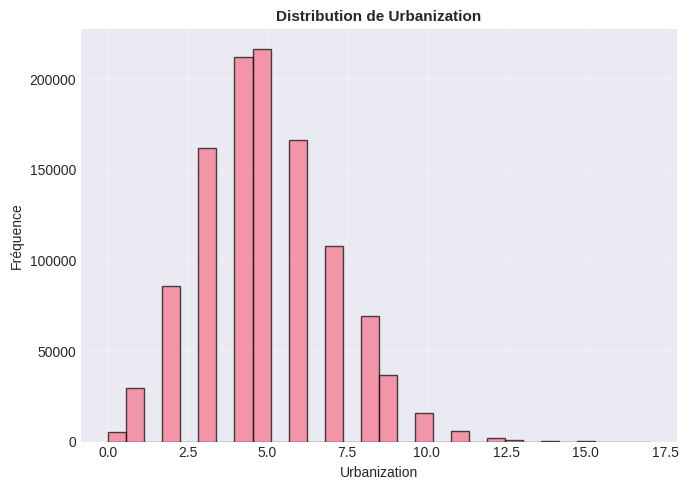

La variable Urbanization présente une distribution relativement symétrique. 
La moyenne est d’environ 4.94 avec un écart-type de 2.08. 
Cela indique la dispersion des valeurs autour de la moyenne. 
Cette distribution est importante à considérer pour le choix et le comportement des modèles de prédiction.
--------------------------------------------------------------------------------


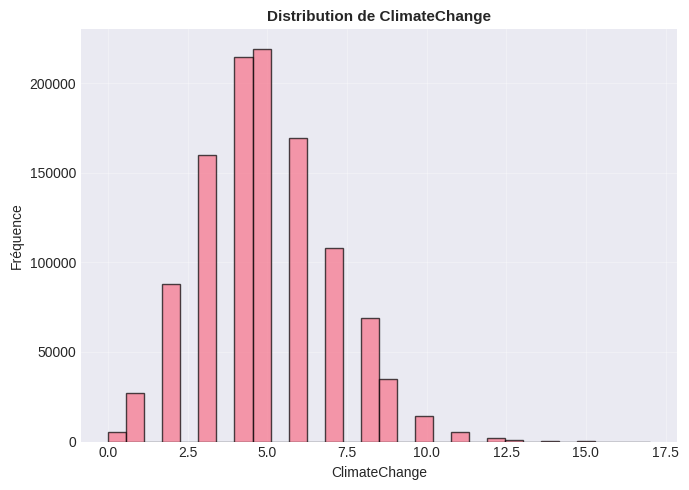

La variable ClimateChange présente une distribution relativement symétrique. 
La moyenne est d’environ 4.93 avec un écart-type de 2.06. 
Cela indique la dispersion des valeurs autour de la moyenne. 
Cette distribution est importante à considérer pour le choix et le comportement des modèles de prédiction.
--------------------------------------------------------------------------------


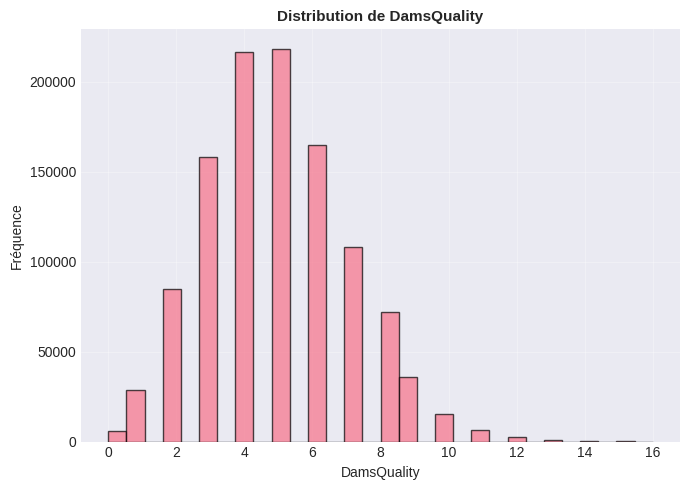

La variable DamsQuality présente une distribution relativement symétrique. 
La moyenne est d’environ 4.96 avec un écart-type de 2.08. 
Cela indique la dispersion des valeurs autour de la moyenne. 
Cette distribution est importante à considérer pour le choix et le comportement des modèles de prédiction.
--------------------------------------------------------------------------------


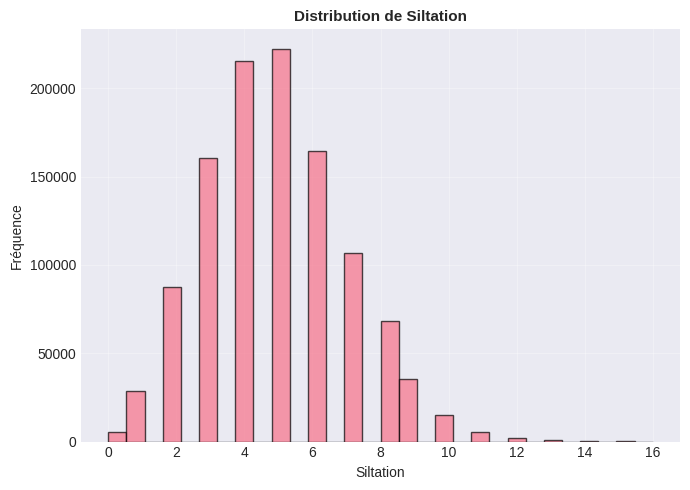

La variable Siltation présente une distribution relativement symétrique. 
La moyenne est d’environ 4.93 avec un écart-type de 2.07. 
Cela indique la dispersion des valeurs autour de la moyenne. 
Cette distribution est importante à considérer pour le choix et le comportement des modèles de prédiction.
--------------------------------------------------------------------------------


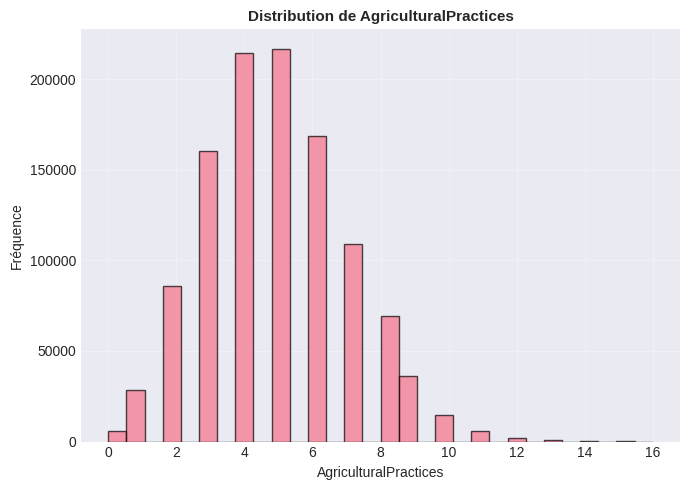

La variable AgriculturalPractices présente une distribution relativement symétrique. 
La moyenne est d’environ 4.94 avec un écart-type de 2.07. 
Cela indique la dispersion des valeurs autour de la moyenne. 
Cette distribution est importante à considérer pour le choix et le comportement des modèles de prédiction.
--------------------------------------------------------------------------------


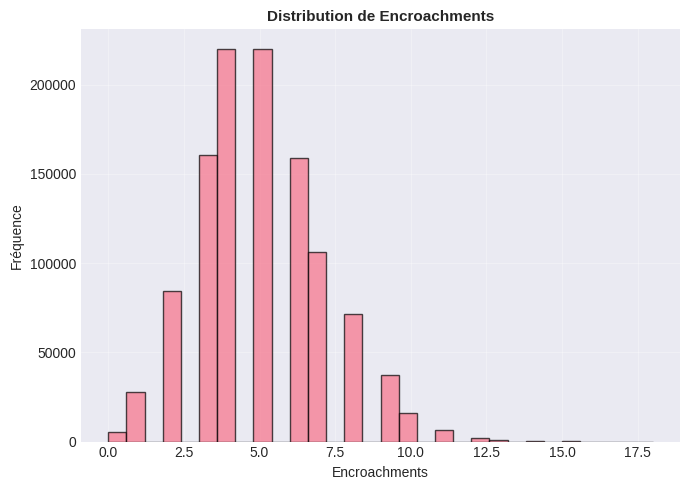

La variable Encroachments présente une distribution relativement symétrique. 
La moyenne est d’environ 4.95 avec un écart-type de 2.08. 
Cela indique la dispersion des valeurs autour de la moyenne. 
Cette distribution est importante à considérer pour le choix et le comportement des modèles de prédiction.
--------------------------------------------------------------------------------


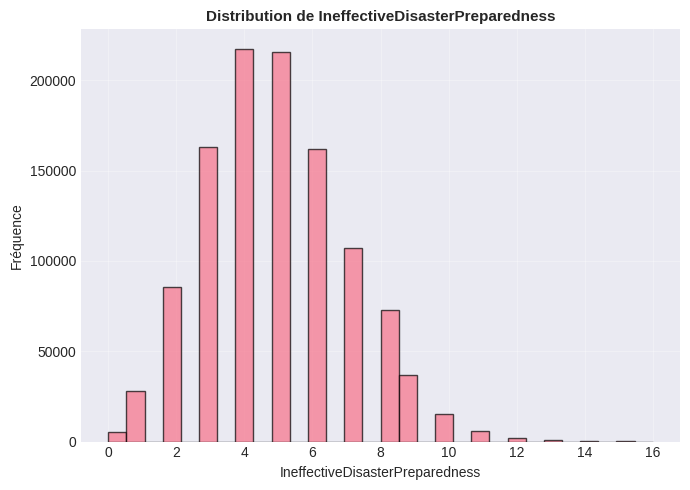

La variable IneffectiveDisasterPreparedness présente une distribution relativement symétrique. 
La moyenne est d’environ 4.95 avec un écart-type de 2.08. 
Cela indique la dispersion des valeurs autour de la moyenne. 
Cette distribution est importante à considérer pour le choix et le comportement des modèles de prédiction.
--------------------------------------------------------------------------------


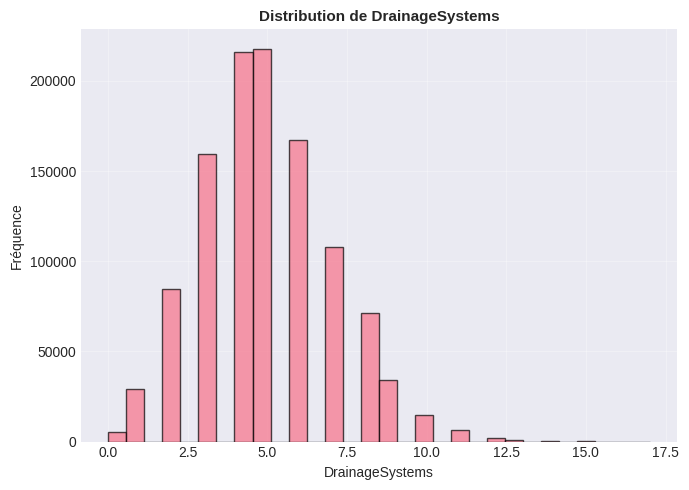

La variable DrainageSystems présente une distribution relativement symétrique. 
La moyenne est d’environ 4.95 avec un écart-type de 2.07. 
Cela indique la dispersion des valeurs autour de la moyenne. 
Cette distribution est importante à considérer pour le choix et le comportement des modèles de prédiction.
--------------------------------------------------------------------------------


In [7]:
selected_vars = feature_cols[:12]  # Premières 12 variables

for var in selected_vars:
    plt.figure(figsize=(7, 5))
    
    data = train_df[var].dropna()
    
    plt.hist(
        data,
        bins=30,
        edgecolor='black',
        alpha=0.7
    )
    
    plt.xlabel(var, fontsize=10)
    plt.ylabel('Fréquence', fontsize=10)
    plt.title(f'Distribution de {var}', fontsize=11, fontweight='bold')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Analyse statistique simple pour commentaire
    mean = data.mean()
    std = data.std()
    skew = data.skew()
        
    if abs(skew) < 0.5:
        shape = "une distribution relativement symétrique"
    elif skew > 0:
        shape = "une distribution asymétrique à droite (queue vers les grandes valeurs)"
    else:
        shape = "une distribution asymétrique à gauche (queue vers les petites valeurs)"
    
    print(
        f"La variable {var} présente {shape}. \n"
        f"La moyenne est d’environ {mean:.2f} avec un écart-type de {std:.2f}. \n"
        "Cela indique la dispersion des valeurs autour de la moyenne. \n"
        "Cette distribution est importante à considérer pour le choix et le comportement des modèles de prédiction."
    )
    print("-" * 80)


#### Graphique 4: Corrélations avec la variable cible

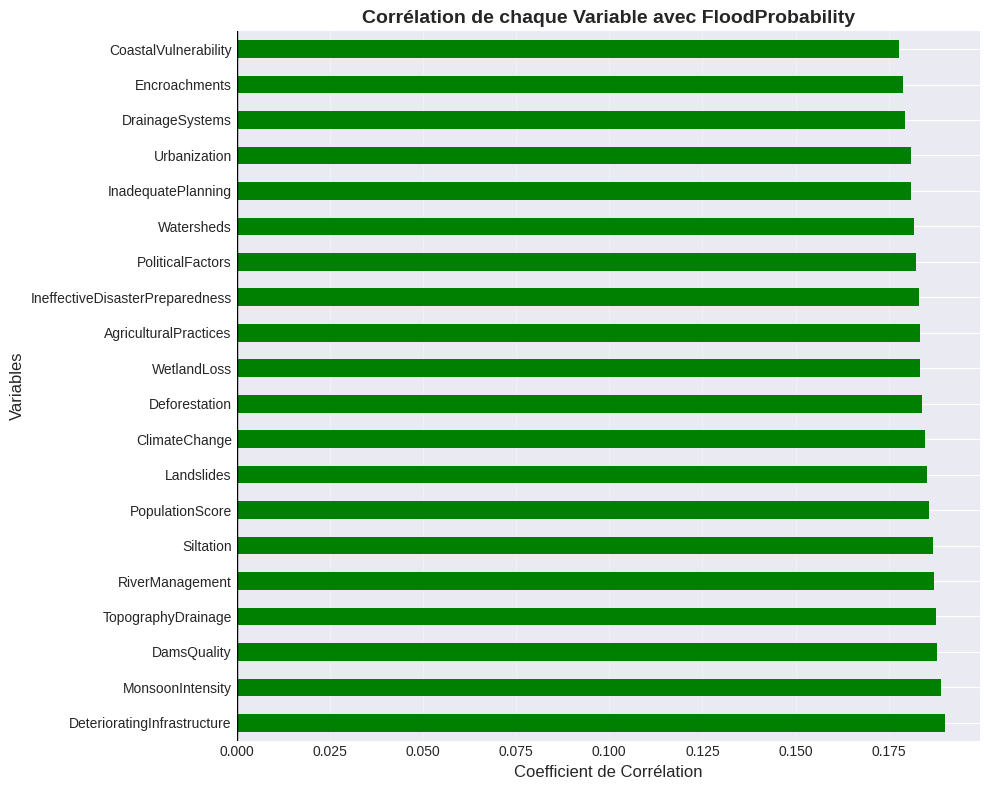

In [8]:
# Corrélations avec la variable cible
corr_with_target = train_df[feature_cols].corrwith(train_df['FloodProbability']).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
colors = ['red' if x < 0 else 'green' for x in corr_with_target.values]
corr_with_target.plot(kind='barh', color=colors, figsize=(10, 8))
plt.xlabel('Coefficient de Corrélation', fontsize=12)
plt.ylabel('Variables', fontsize=12)
plt.title('Corrélation de chaque Variable avec FloodProbability', 
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)
plt.tight_layout()
plt.show()

#### Calculer et afficher les corrélations

In [9]:
# Corrélations par ordre d'importance
correlations = train_df[feature_cols].corrwith(train_df['FloodProbability']).sort_values(ascending=False)

print(f"Variable la plus corrélée: {correlations.idxmax()} ({correlations.max():.4f})")
print(f"Variable la moins corrélée: {correlations.idxmin()} ({correlations.min():.4f})")

Variable la plus corrélée: DeterioratingInfrastructure (0.1900)
Variable la moins corrélée: CoastalVulnerability (0.1778)


### PARTITION DU DATASET, TRAINING ET TESTING

#### Préparation des données

Nous allons :
1. Séparer les **features** (X) de la **target** (y)
2. Partitionner en **training** (80%) et **validation** (20%)
3. Standardiser les données pour certains modèles


In [10]:
# Préparation des données
X = train_df[feature_cols]
y = train_df['FloodProbability']


#### Partition Train/Validation

**Méthode** : `train_test_split` de scikit-learn
- **Ratio** : 80% training, 20% validation
- **Shuffle** : Oui (mélange aléatoire)
- **Random_state** : 42 (pour reproductibilité)

In [11]:
# Partition train/validation (80/20)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# Standardisation pour les modèles linéaires
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

### ENTRAÎNEMENT ET ÉVALUATION DES MODÈLES

Dans cette section, nous allons entraîner et évaluer deux modèles :
1. **Régression Linéaire Multiple**
2. **Random Forest**

In [12]:
# Modèle 1 : Régression Linéaire Multiple
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_predictions_train = lr_model.predict(X_train_scaled)
lr_predictions_val = lr_model.predict(X_val_scaled)

# Modèle 2 : Random Forest
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1,
    verbose=0
)
rf_model.fit(X_train, y_train)
rf_predictions_train = rf_model.predict(X_train)
rf_predictions_val = rf_model.predict(X_val)

In [13]:
# Aperçu des prédictions (10 premières)
print("Régression Linéaire - Aperçu:")
for i in range(10):
    print(f"Réel: {y_val.iloc[i]:.3f} | Prédit: {lr_predictions_val[i]:.3f} | Erreur: {abs(y_val.iloc[i] - lr_predictions_val[i]):.3f}")

print("\nRandom Forest - Aperçu:")
for i in range(10):
    print(f"Réel: {y_val.iloc[i]:.3f} | Prédit: {rf_predictions_val[i]:.3f} | Erreur: {abs(y_val.iloc[i] - rf_predictions_val[i]):.3f}")



Régression Linéaire - Aperçu:
Réel: 0.560 | Prédit: 0.534 | Erreur: 0.026
Réel: 0.575 | Prédit: 0.585 | Erreur: 0.010
Réel: 0.510 | Prédit: 0.523 | Erreur: 0.013
Réel: 0.530 | Prédit: 0.539 | Erreur: 0.009
Réel: 0.590 | Prédit: 0.579 | Erreur: 0.011
Réel: 0.630 | Prédit: 0.647 | Erreur: 0.017
Réel: 0.455 | Prédit: 0.466 | Erreur: 0.011
Réel: 0.510 | Prédit: 0.494 | Erreur: 0.016
Réel: 0.395 | Prédit: 0.404 | Erreur: 0.009
Réel: 0.460 | Prédit: 0.472 | Erreur: 0.012

Random Forest - Aperçu:
Réel: 0.560 | Prédit: 0.518 | Erreur: 0.042
Réel: 0.575 | Prédit: 0.530 | Erreur: 0.045
Réel: 0.510 | Prédit: 0.532 | Erreur: 0.022
Réel: 0.530 | Prédit: 0.543 | Erreur: 0.013
Réel: 0.590 | Prédit: 0.570 | Erreur: 0.020
Réel: 0.630 | Prédit: 0.599 | Erreur: 0.031
Réel: 0.455 | Prédit: 0.487 | Erreur: 0.032
Réel: 0.510 | Prédit: 0.495 | Erreur: 0.015
Réel: 0.395 | Prédit: 0.452 | Erreur: 0.057
Réel: 0.460 | Prédit: 0.483 | Erreur: 0.023


### ÉVALUATION ET COMPARAISON DES MODÈLES

In [14]:
# Fonction pour calculer les métriques
def calculate_metrics(y_true, y_pred):
    return {
        'MSE': mean_squared_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAE': mean_absolute_error(y_true, y_pred),
        'R2': r2_score(y_true, y_pred)
    }

# Évaluation des modèles
lr_train_metrics = calculate_metrics(y_train, lr_predictions_train)
lr_val_metrics = calculate_metrics(y_val, lr_predictions_val)
rf_train_metrics = calculate_metrics(y_train, rf_predictions_train)
rf_val_metrics = calculate_metrics(y_val, rf_predictions_val)

# Tableau comparatif
comparison_df = pd.DataFrame({
    'Métrique': ['MSE', 'RMSE', 'MAE', 'R²'],
    'Régression Linéaire (Train)': [lr_train_metrics['MSE'], lr_train_metrics['RMSE'], 
                                     lr_train_metrics['MAE'], lr_train_metrics['R2']],
    'Régression Linéaire (Val)': [lr_val_metrics['MSE'], lr_val_metrics['RMSE'], 
                                   lr_val_metrics['MAE'], lr_val_metrics['R2']],
    'Random Forest (Train)': [rf_train_metrics['MSE'], rf_train_metrics['RMSE'], 
                              rf_train_metrics['MAE'], rf_train_metrics['R2']],
    'Random Forest (Val)': [rf_val_metrics['MSE'], rf_val_metrics['RMSE'], 
                            rf_val_metrics['MAE'], rf_val_metrics['R2']]
})

print(comparison_df.to_string(index=False))

# Meilleur modèle
if rf_val_metrics['R2'] > lr_val_metrics['R2']:
    meilleur = "Random Forest"
    diff_r2 = rf_val_metrics['R2'] - lr_val_metrics['R2']
else:
    meilleur = "Régression Linéaire Multiple"
    diff_r2 = lr_val_metrics['R2'] - rf_val_metrics['R2']

print(f"\nMeilleur modèle: {meilleur} (R² validation: {max(rf_val_metrics['R2'], lr_val_metrics['R2']):.4f})")

Métrique  Régression Linéaire (Train)  Régression Linéaire (Val)  Random Forest (Train)  Random Forest (Val)
     MSE                     0.000404                   0.000403               0.000409             0.000955
    RMSE                     0.020095                   0.020080               0.020224             0.030911
     MAE                     0.015815                   0.015792               0.016339             0.025232
      R²                     0.844968                   0.844877               0.842972             0.632403

Meilleur modèle: Régression Linéaire Multiple (R² validation: 0.8449)


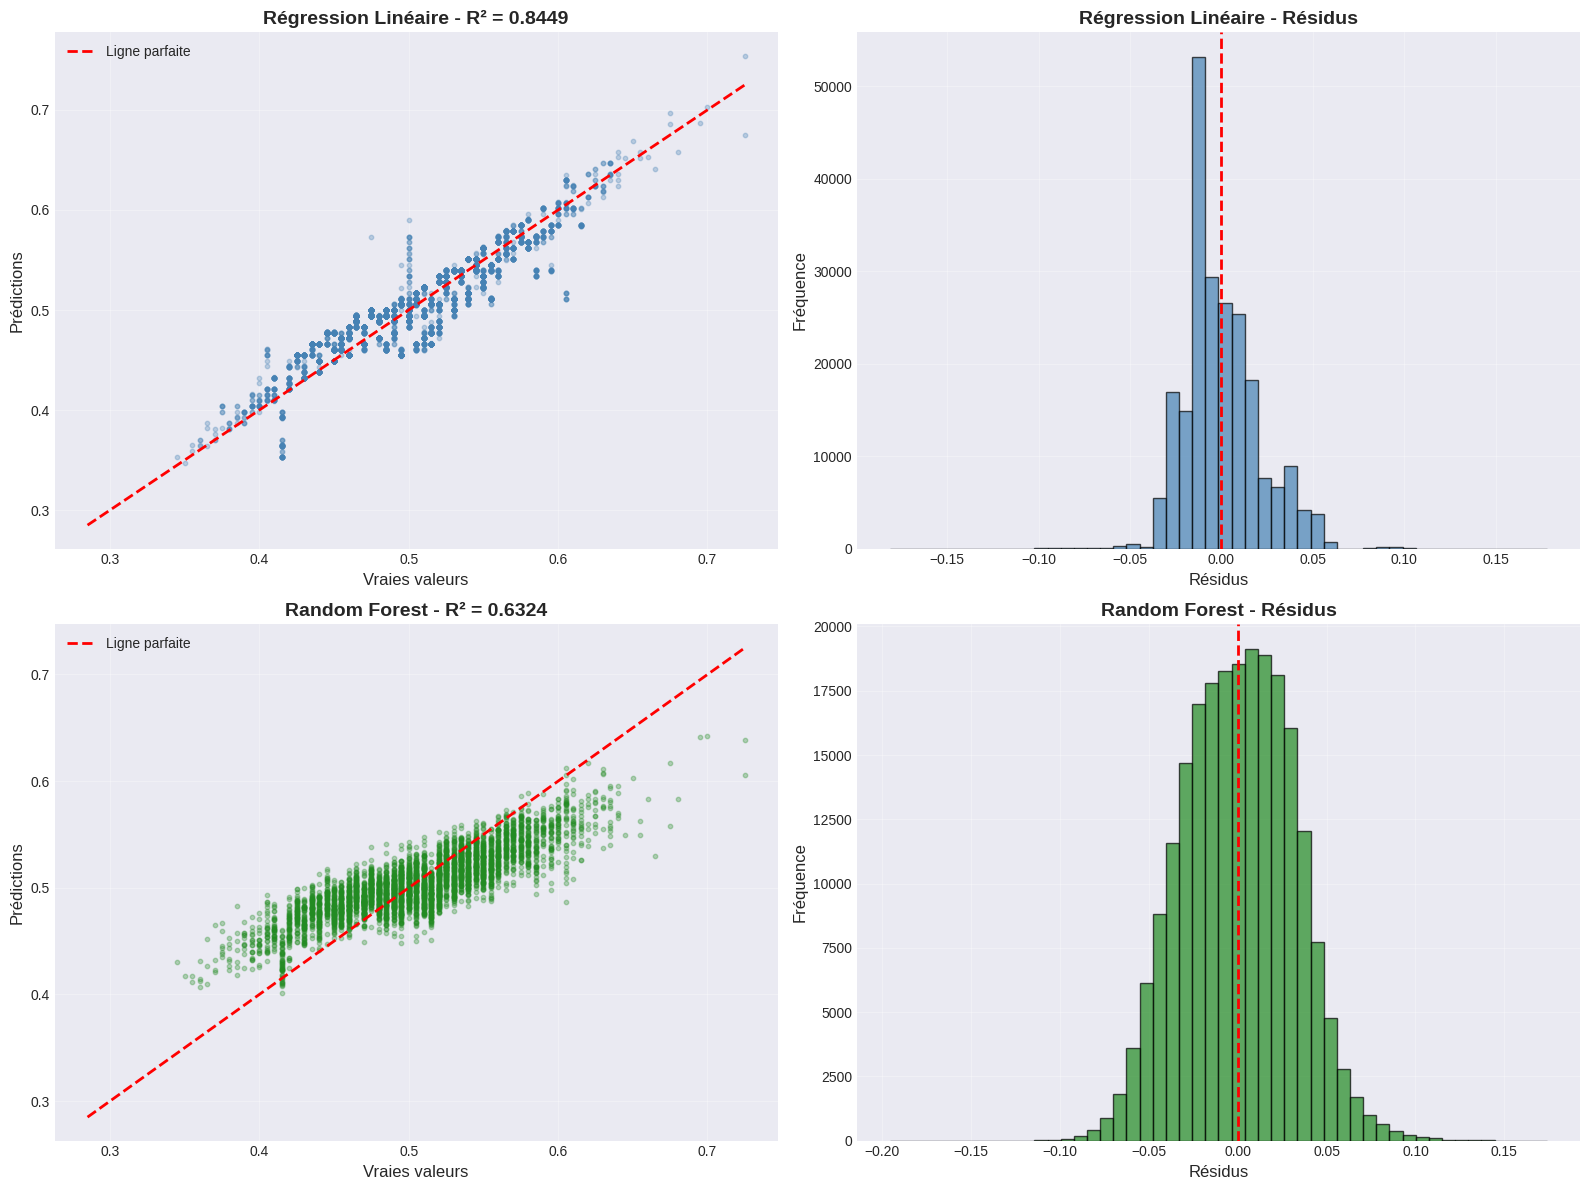

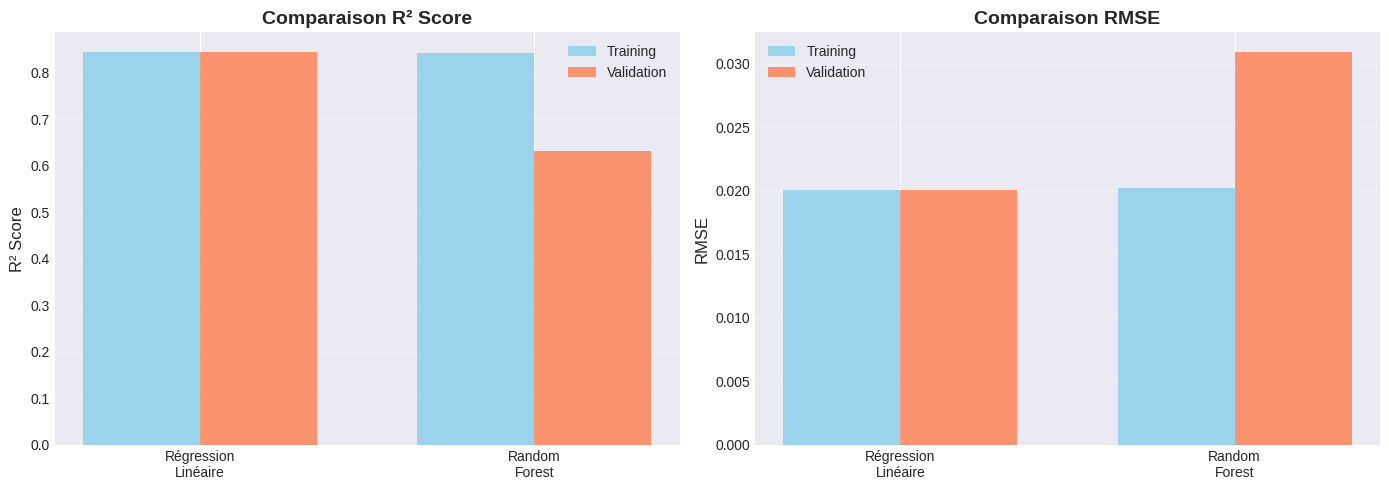

In [15]:
# Visualisation comparative
sample_size = min(5000, len(y_val))
np.random.seed(42)
sample_idx = np.random.choice(len(y_val), sample_size, replace=False)

y_val_sample = y_val.iloc[sample_idx]
lr_pred_sample = lr_predictions_val[sample_idx]
rf_pred_sample = rf_predictions_val[sample_idx]

# Prédictions vs Réalité
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

axes[0, 0].scatter(y_val_sample, lr_pred_sample, alpha=0.3, s=10, color='steelblue')
axes[0, 0].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2, label='Ligne parfaite')
axes[0, 0].set_xlabel('Vraies valeurs', fontsize=12)
axes[0, 0].set_ylabel('Prédictions', fontsize=12)
axes[0, 0].set_title(f'Régression Linéaire - R² = {lr_val_metrics["R2"]:.4f}', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

lr_residuals = y_val - lr_predictions_val
axes[0, 1].hist(lr_residuals, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 1].set_xlabel('Résidus', fontsize=12)
axes[0, 1].set_ylabel('Fréquence', fontsize=12)
axes[0, 1].set_title('Régression Linéaire - Résidus', fontsize=14, fontweight='bold')
axes[0, 1].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].scatter(y_val_sample, rf_pred_sample, alpha=0.3, s=10, color='forestgreen')
axes[1, 0].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2, label='Ligne parfaite')
axes[1, 0].set_xlabel('Vraies valeurs', fontsize=12)
axes[1, 0].set_ylabel('Prédictions', fontsize=12)
axes[1, 0].set_title(f'Random Forest - R² = {rf_val_metrics["R2"]:.4f}', fontsize=14, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

rf_residuals = y_val - rf_predictions_val
axes[1, 1].hist(rf_residuals, bins=50, edgecolor='black', alpha=0.7, color='forestgreen')
axes[1, 1].set_xlabel('Résidus', fontsize=12)
axes[1, 1].set_ylabel('Fréquence', fontsize=12)
axes[1, 1].set_title('Random Forest - Résidus', fontsize=14, fontweight='bold')
axes[1, 1].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Comparaison des métriques
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
models = ['Régression\nLinéaire', 'Random\nForest']
x = np.arange(len(models))
width = 0.35

axes[0].bar(x - width/2, [lr_train_metrics['R2'], rf_train_metrics['R2']], width, label='Training', color='skyblue', alpha=0.8)
axes[0].bar(x + width/2, [lr_val_metrics['R2'], rf_val_metrics['R2']], width, label='Validation', color='coral', alpha=0.8)
axes[0].set_ylabel('R² Score', fontsize=12)
axes[0].set_title('Comparaison R² Score', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(models)
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

axes[1].bar(x - width/2, [lr_train_metrics['RMSE'], rf_train_metrics['RMSE']], width, label='Training', color='skyblue', alpha=0.8)
axes[1].bar(x + width/2, [lr_val_metrics['RMSE'], rf_val_metrics['RMSE']], width, label='Validation', color='coral', alpha=0.8)
axes[1].set_ylabel('RMSE', fontsize=12)
axes[1].set_title('Comparaison RMSE', fontsize=14, fontweight='bold')
axes[1].set_xticks(x)
axes[1].set_xticklabels(models)
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()